In [5]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import os

def load_rewards(folder_number=0, method=None, test_type=None):
    load_path = os.path.join('../output/' + method + '/PendulumDelayEnv/Results-' + test_type,
                             'PendulumDelayEnv-run' + str(folder_number),
                             'model.pt')
    ckpt = torch.load(load_path)
    return torch.as_tensor(ckpt['avg_reward'])

def load_stds(folder_number=0, method=None, test_type=None):
    load_path = os.path.join('../output/' + method + '/PendulumDelayEnv/Results-' + test_type,
                             'PendulumDelayEnv-run' + str(folder_number),
                             'model.pt')
    ckpt = torch.load(load_path)
    return torch.as_tensor(ckpt['std_reward'])

def stats_rewards(folders, method=None, test_type=None):
    rewards = load_rewards(folders[0], method=method, test_type=test_type).unsqueeze(0)
    stds = load_stds(folders[0], method=method, test_type=test_type).unsqueeze(0)
    for folder in folders[1:]:
        rewards = torch.cat((rewards, load_rewards(folder, method=method, test_type=test_type).unsqueeze(0)), dim=0)
        stds = torch.cat((stds, load_stds(folder, method=method, test_type=test_type).unsqueeze(0)), dim=0)
    mean = torch.mean(rewards, dim=0)
    std = torch.mean(stds, dim=0)
    return mean, std

def load_test_reward(folder_number=0, method=None, test_type=None):
    load_path = os.path.join('../output/' + method + '/PendulumDelayEnv/Results-' + test_type,
                             'PendulumDelayEnv-run' + str(folder_number),
                             'test_result.pt')
    ckpt = torch.load(load_path)
    return [np.average(ckpt)]

def load_test_std(folder_number=0, method=None, test_type=None):
    load_path = os.path.join('../output/' + method + '/PendulumDelayEnv/Results-' + test_type,
                             'PendulumDelayEnv-run' + str(folder_number),
                             'test_result.pt')
    ckpt = torch.load(load_path)
    return [np.std(ckpt)]

def stats_test(folders, method=None, test_type=None):
    rewards = load_test_reward(folders[0], method=method, test_type=test_type)
    stds = load_test_std(folders[0], method=method, test_type=test_type)
    for folder in folders[1:]:
        rewards = rewards + load_test_reward(folder, method=method, test_type=test_type)
        stds = stds + load_test_std(folder, method=method, test_type=test_type)
    mean = np.average(rewards)
    std = np.average(stds)
    return mean, std

## Training Process Plot

Text(0, 0.5, 'Average Reward')

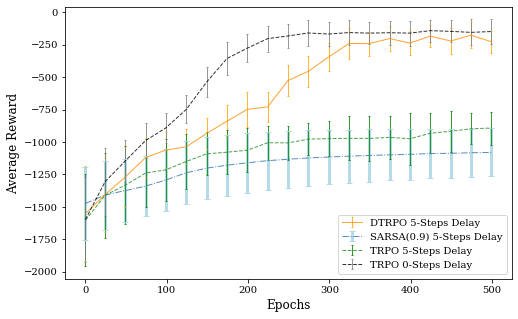

In [14]:
dtrpo_enc_avg, dtrpo_enc_std = stats_rewards([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay5')
trpo_ext_avg, trpo_ext_std = stats_rewards([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay5')
trpo_0_avg, trpo_0_std = stats_rewards([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay0')
sarsa_avg, sarsa_std = stats_rewards([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay5')

episode_num = len(dtrpo_enc_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='large')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(epochs, dtrpo_enc_avg[epochs], yerr=dtrpo_enc_std[epochs], color='darkorange', ls='solid',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='DTRPO 5-Steps Delay')
ax.errorbar(epochs, sarsa_avg[epochs], yerr=sarsa_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='SARSA(0.9) 5-Steps Delay')
ax.errorbar(epochs, trpo_ext_avg[epochs], yerr=trpo_ext_std[epochs], color='forestgreen', ls='dashed',
            alpha=0.8, linewidth=1, ecolor='green', elinewidth=1, capsize=1, label='TRPO 5-Steps Delay')
ax.errorbar(epochs, trpo_0_avg[epochs], yerr=trpo_0_std[epochs], color='black', ls='dashed',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='TRPO 0-Steps Delay')
#goal_line = torch.as_tensor([-200] * episode_num, dtype=torch.float32)
#ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)

ax.legend(fontsize='medium')
ax.set_xticks(np.arange(0, 501, 100))
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./paper_plots/InvertedPendulum5StepsDelayLearning.png', dpi=1000)

## Test Summary Plot

In [15]:
dtrpo_delay3_avg, dtrpo_delay3_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay3')
dtrpo_delay5_avg, dtrpo_delay5_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay5')
dtrpo_delay10_avg, dtrpo_delay10_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay10')
dtrpo_delay15_avg, dtrpo_delay15_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay15')
dtrpo_delay20_avg, dtrpo_delay20_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='dtrpo', test_type='DET-Delay20')
dtrpo_avg = [dtrpo_delay3_avg, dtrpo_delay5_avg, dtrpo_delay10_avg, dtrpo_delay15_avg, dtrpo_delay20_avg]
dtrpo_std = [dtrpo_delay3_std, dtrpo_delay5_std, dtrpo_delay10_std, dtrpo_delay15_std, dtrpo_delay20_std]

trpo_delay3_avg, trpo_delay3_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay3')
trpo_delay5_avg, trpo_delay5_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay5')
trpo_delay10_avg, trpo_delay10_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay10')
trpo_delay15_avg, trpo_delay15_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9], method='trpo', test_type='Delay15')
trpo_delay20_avg, trpo_delay20_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='trpo', test_type='Delay20')
trpo_avg = [trpo_delay3_avg, trpo_delay5_avg, trpo_delay10_avg, trpo_delay15_avg, trpo_delay20_avg]
trpo_std = [trpo_delay3_std, trpo_delay5_std, trpo_delay10_std, trpo_delay15_std, trpo_delay20_std]

sarsa_delay3_avg, sarsa_delay3_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay3')
sarsa_delay5_avg, sarsa_delay5_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay5')
sarsa_delay10_avg, sarsa_delay10_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay10')
sarsa_delay15_avg, sarsa_delay15_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay15')
sarsa_delay20_avg, sarsa_delay20_std = stats_test([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], method='sarsa', test_type='Delay20')
sarsa_avg = [sarsa_delay3_avg, sarsa_delay5_avg, sarsa_delay10_avg, sarsa_delay15_avg, sarsa_delay20_avg]
sarsa_std = [sarsa_delay3_std, sarsa_delay5_std, sarsa_delay10_std, sarsa_delay15_std, sarsa_delay20_std]

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='x-large')
plt.rc('legend', handleheight=2)

x = ['3', '5', '10', '15', '20']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(x, dtrpo_avg, yerr=dtrpo_std, color='darkorange', ls='solid',
            alpha=0.9, linewidth=2, ecolor='orange', elinewidth=2, capsize=7, label='DTRPO')
ax.errorbar(x, trpo_avg, yerr=trpo_std, color='forestgreen', ls='dashed',
            alpha=0.9, linewidth=2, ecolor='green', elinewidth=2, capsize=7, label='TRPO')
ax.errorbar(x, sarsa_avg, yerr=sarsa_std, color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=2, ecolor='lightblue', elinewidth=2, capsize=7, label='SARSA(0.9)')
ax.legend(fontsize='small')
ax.set_xlabel('Simulated Delay-steps')
ax.set_ylabel('Average Reward')
fig.savefig('./paper_plots/InvertedPendulumSummary.png', dpi=1000)

FileNotFoundError: [Errno 2] No such file or directory: '../output/sarsa/PendulumDelayEnv/Results-Delay3\\PendulumDelayEnv-run1\\test_result.pt'